# NLP

In [1]:
import nltk
import pandas as pd
import chardet
from matplotlib import pyplot as plt
import re
import seaborn as sns
import numpy as np
from statsmodels import api as sm
from wordcloud import WordCloud
from collections import Counter
import gensim
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import sklearn
import networkx as nx
import itertools
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
# Download nltk data; turn to true if first time
if False:
    # nltk.download()
    nltk.download('punkt')
    nltk.download('stopwords')
    nltk.download('vader_lexicon')

In [3]:
sns.set_theme(color_codes = True)

### Inputs

In [4]:
# Text Laguage
language = 'english'

# Figure default size
plt.rcParams['figure.figsize'] = (10, 5)

### Detect Encoding

In [5]:
with open('Harry Potter 1 - The Sorcerer.txt', 'rb') as f:
    
    e = chardet.detect(f.read())
    
    print(e)

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}


### Load File

In [6]:
with open('Harry Potter 1 - The Sorcerer.txt', 'r', encoding = e['encoding']) as f:
    
    text = f.read()
    
print(text[:200])

Harry Potter and the Sorcerer's Stone 

CHAPTER ONE 

THE BOY WHO LIVED 

Mr. and Mrs. Dursley, of number four, Privet Drive, were proud to say that they were perfectly normal, thank you very much. Th


Remove "said" that is too frequent

In [7]:
text = re.sub('said', '', text)

### Word Cloud

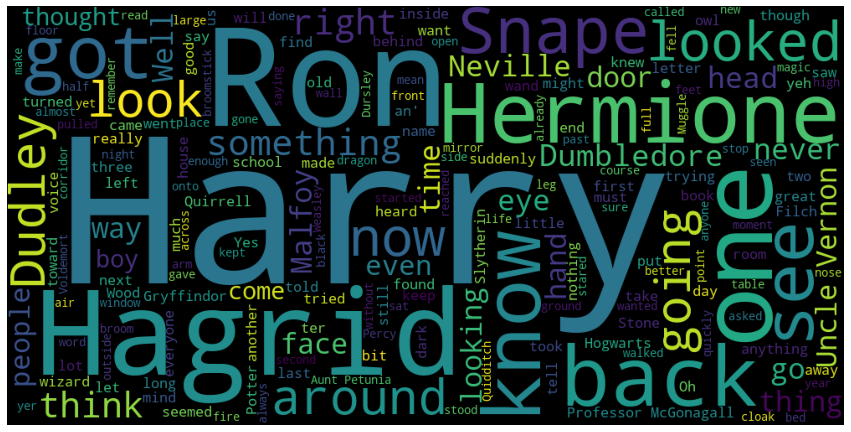

In [8]:
wc = WordCloud(width = 1000, height = 500).generate_from_text(text)

plt.figure(figsize=(15,8))

plt.imshow(wc)
plt.axis("off")
plt.show()

### Split chapters

In [9]:
chapters = re.split('\n\nCHAPTER \w+ \n\n', text)[1:]

chapters_pd = pd.DataFrame(
    ['\n'.join(i.split('\n\n')[1:]) for i in chapters],
    index = [i.split('\n\n')[0] for i in chapters]

)

chapters_pd.columns = ['raw text']

chapters_pd

,raw text
THE BOY WHO LIVED,"Mr. and Mrs. Dursley, of number four, Privet D..."
THE VANISHING GLASS,Nearly ten years had passed since the Dursleys...
THE LETTERS FROM NO ONE,The escape of the Brazilian boa constrictor ea...
THE KEEPER OF THE KEYS,BOOM. They knocked again. Dudley jerked awake....
DIAGON ALLEY,Harry woke early the next morning. Although he...
THE JOURNEY FROM PLATFORM NINE AND THREE-QUARTERS,Harry's last month with the Dursleys wasn't fu...
THE SORTING HAT,"The door swung open at once. A tall, black-hai..."
THE POTIONS MASTER,"There, look."" \n""Where?"" \n""Next to the tall k..."
HALLOWEEN,Malfoy couldn't believe his eyes when he saw t...
QUIDDITCH,"As they entered November, the weather turned v..."


##### Apply Transformations on chapters

In [11]:
# Remove puctuation
remove_puctuation = lambda a: [i for i in a if i.isalnum()]

# Create tokens
chapters_pd['token'] = chapters_pd['raw text'].apply(
    
    lambda s: remove_puctuation( nltk.tokenize.word_tokenize (s.lower()) )
    
) 

# Remove Stop Words
stop_words = set(nltk.corpus.stopwords.words(language))

chapters_pd['no stop words'] = chapters_pd['token'].apply(
    lambda s: [w for w in s if w not in stop_words]
)

# Stemming
ps = nltk.stem.PorterStemmer()

chapters_pd['stemming'] = chapters_pd['no stop words'].apply(
    lambda s: [ps.stem(w) for w in s]
)

# Lemmatization
lem = nltk.stem.wordnet.WordNetLemmatizer()

chapters_pd['lemmatization'] = chapters_pd['no stop words'].apply(
    lambda s: [lem.lemmatize(w,"v") for w in s]
)

In [11]:
chapters_pd

,raw text,token,no stop words,stemming,lemmatization
THE BOY WHO LIVED,"Mr. and Mrs. Dursley, of number four, Privet D...","[and, dursley, of, number, four, privet, drive...","[dursley, number, four, privet, drive, proud, ...","[dursley, number, four, privet, drive, proud, ...","[dursley, number, four, privet, drive, proud, ..."
THE VANISHING GLASS,Nearly ten years had passed since the Dursleys...,"[nearly, ten, years, had, passed, since, the, ...","[nearly, ten, years, passed, since, dursleys, ...","[nearli, ten, year, pass, sinc, dursley, woken...","[nearly, ten, years, pass, since, dursleys, wa..."
THE LETTERS FROM NO ONE,The escape of the Brazilian boa constrictor ea...,"[the, escape, of, the, brazilian, boa, constri...","[escape, brazilian, boa, constrictor, earned, ...","[escap, brazilian, boa, constrictor, earn, har...","[escape, brazilian, boa, constrictor, earn, ha..."
THE KEEPER OF THE KEYS,BOOM. They knocked again. Dudley jerked awake....,"[boom, they, knocked, again, dudley, jerked, a...","[boom, knocked, dudley, jerked, awake, cannon,...","[boom, knock, dudley, jerk, awak, cannon, stup...","[boom, knock, dudley, jerk, awake, cannon, stu..."
DIAGON ALLEY,Harry woke early the next morning. Although he...,"[harry, woke, early, the, next, morning, altho...","[harry, woke, early, next, morning, although, ...","[harri, woke, earli, next, morn, although, cou...","[harry, wake, early, next, morning, although, ..."
THE JOURNEY FROM PLATFORM NINE AND THREE-QUARTERS,Harry's last month with the Dursleys wasn't fu...,"[harry, last, month, with, the, dursleys, was,...","[harry, last, month, dursleys, fun, true, dudl...","[harri, last, month, dursley, fun, true, dudle...","[harry, last, month, dursleys, fun, true, dudl..."
THE SORTING HAT,"The door swung open at once. A tall, black-hai...","[the, door, swung, open, at, once, a, tall, wi...","[door, swung, open, tall, witch, robes, stood,...","[door, swung, open, tall, witch, robe, stood, ...","[door, swing, open, tall, witch, rob, stand, s..."
THE POTIONS MASTER,"There, look."" \n""Where?"" \n""Next to the tall k...","[there, look, where, next, to, the, tall, kid,...","[look, next, tall, kid, red, hair, wearing, gl...","[look, next, tall, kid, red, hair, wear, glass...","[look, next, tall, kid, red, hair, wear, glass..."
HALLOWEEN,Malfoy couldn't believe his eyes when he saw t...,"[malfoy, could, believe, his, eyes, when, he, ...","[malfoy, could, believe, eyes, saw, harry, ron...","[malfoy, could, believ, eye, saw, harri, ron, ...","[malfoy, could, believe, eye, saw, harry, ron,..."
QUIDDITCH,"As they entered November, the weather turned v...","[as, they, entered, november, the, weather, tu...","[entered, november, weather, turned, cold, mou...","[enter, novemb, weather, turn, cold, mountain,...","[enter, november, weather, turn, cold, mountai..."


### Zipf's Law

In [65]:
def zipf_law(w):
    
    freq = [i[1] for i in w]
    
    r = np.arange(1, len(freq) + 1)
    
    # Plot Results
    sns.regplot(
        # Frequency
        y = np.log(freq),
        # Rank
        x = np.log(r), 
    )

    plt.ylabel('Log(Frequency)')

    plt.xlabel('Log(r)')

    plt.show()
    
    # Linear Regression
    lm = sm.OLS(
        # Frequency
        np.log(freq),
        # Rank
        np.log(r)
    )

    result = lm.fit()

    print(result.summary())

### Zipf's Law and Word Count

token
Number of words:  5675


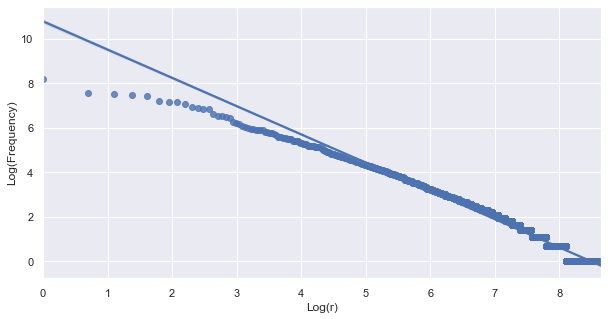

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.286
Model:                            OLS   Adj. R-squared (uncentered):              0.285
Method:                 Least Squares   F-statistic:                              2268.
Date:                Wed, 07 Oct 2020   Prob (F-statistic):                        0.00
Time:                        18:29:59   Log-Likelihood:                         -9991.4
No. Observations:                5675   AIC:                                  1.998e+04
Df Residuals:                    5674   BIC:                                  1.999e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

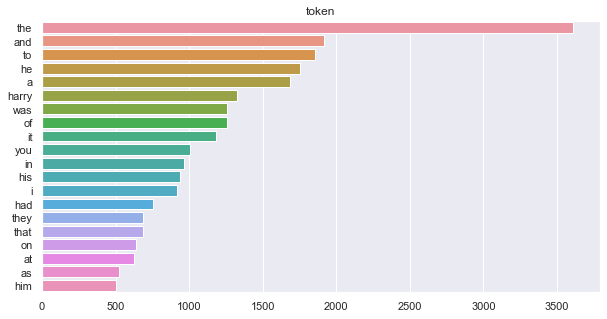

----------------------------------------------------------------------------------------------------
no stop words
Number of words:  5539


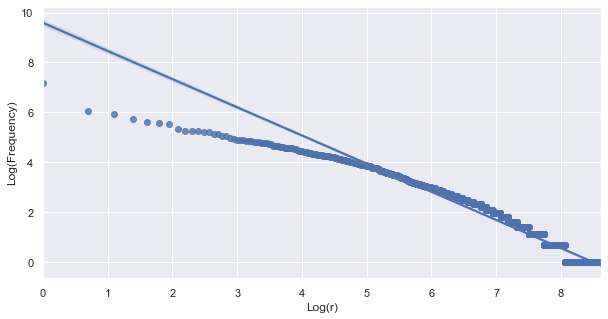

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.299
Model:                            OLS   Adj. R-squared (uncentered):              0.299
Method:                 Least Squares   F-statistic:                              2367.
Date:                Wed, 07 Oct 2020   Prob (F-statistic):                        0.00
Time:                        18:29:59   Log-Likelihood:                         -9168.3
No. Observations:                5539   AIC:                                  1.834e+04
Df Residuals:                    5538   BIC:                                  1.835e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

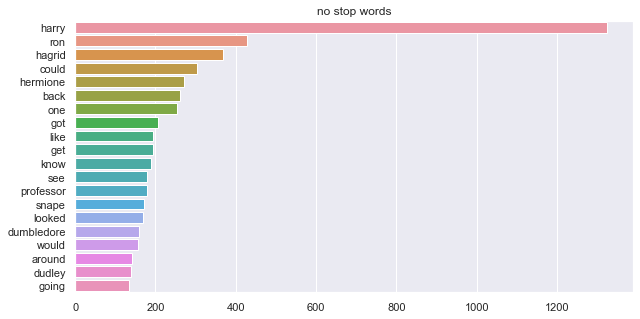

----------------------------------------------------------------------------------------------------
stemming
Number of words:  3961


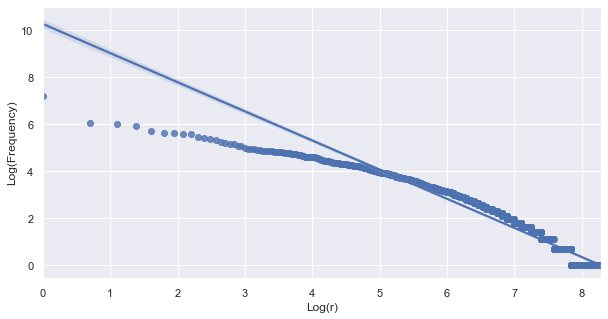

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.348
Model:                            OLS   Adj. R-squared (uncentered):              0.348
Method:                 Least Squares   F-statistic:                              2118.
Date:                Wed, 07 Oct 2020   Prob (F-statistic):                        0.00
Time:                        18:30:00   Log-Likelihood:                         -7018.6
No. Observations:                3961   AIC:                                  1.404e+04
Df Residuals:                    3960   BIC:                                  1.405e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

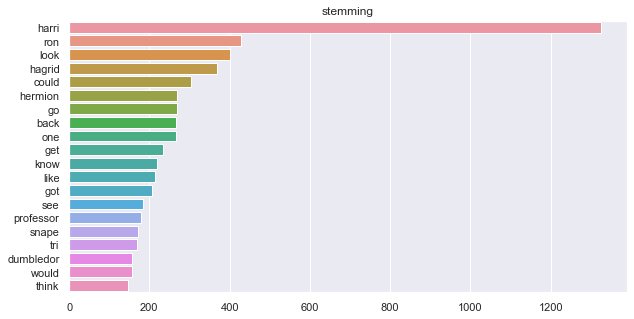

----------------------------------------------------------------------------------------------------
lemmatization
Number of words:  4149


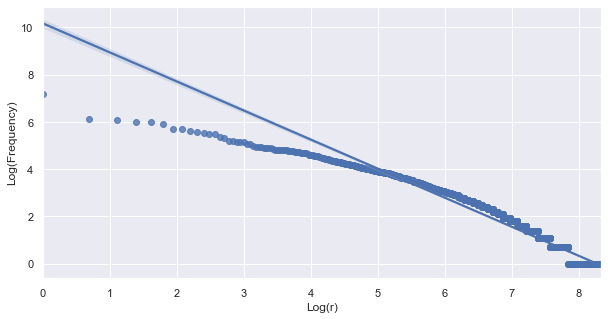

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.328
Model:                            OLS   Adj. R-squared (uncentered):              0.328
Method:                 Least Squares   F-statistic:                              2029.
Date:                Wed, 07 Oct 2020   Prob (F-statistic):                        0.00
Time:                        18:30:01   Log-Likelihood:                         -7275.3
No. Observations:                4149   AIC:                                  1.455e+04
Df Residuals:                    4148   BIC:                                  1.456e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

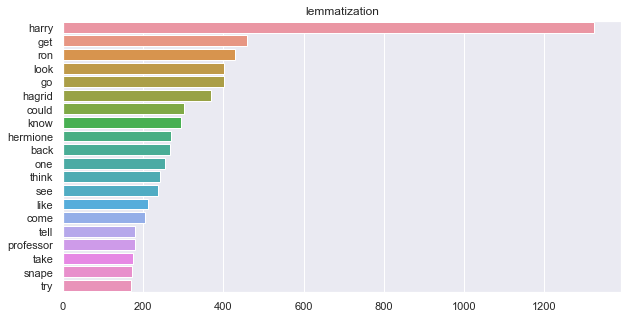

----------------------------------------------------------------------------------------------------


In [66]:
for i in ['token', 'no stop words', 'stemming', 'lemmatization']:
    
    print(i)
    
    tokens = list(
            itertools.chain.from_iterable(chapters_pd[i].to_list())
            )
    
    w = Counter(tokens).most_common()
    
    print('Number of words: ', len(w))
    
    zipf_law(w)
    
    w = w[:20] # First N words

    sns.barplot(
        y = [a[0] for a in w],
        x = [a[1] for a in w]
    )
    
    plt.title(i)

    plt.show()
    
    print('-' * 100)

### TF IDF

Create gensim dictionary

In [13]:
dictionary = gensim.corpora.Dictionary(chapters_pd['lemmatization'])

Create Corpus

In [16]:
corpus = [dictionary.doc2bow(s) for s in chapters_pd['lemmatization']]

In [17]:
tfidf = gensim.models.tfidfmodel.TfidfModel(corpus)

In [18]:
n_chapter = 5
n = 10

for i in pd.DataFrame(tfidf[corpus[n_chapter]]).sort_values(1, ascending = False)[:n].iterrows():
    print(f'{dictionary[i[0]]}: {i[1][1]:.3f}')

wrong: 0.361
animals: 0.272
swap: 0.255
coat: 0.170
yawn: 0.170
never: 0.154
bacon: 0.142
relieve: 0.137
overhead: 0.129
owl: 0.120


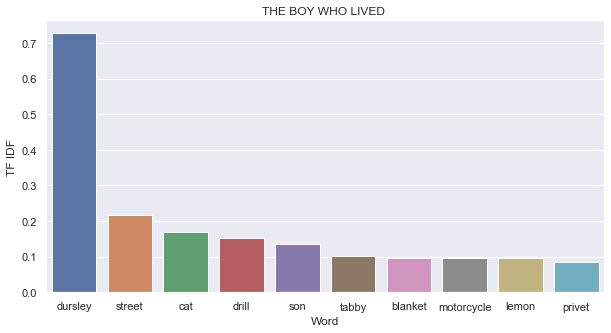

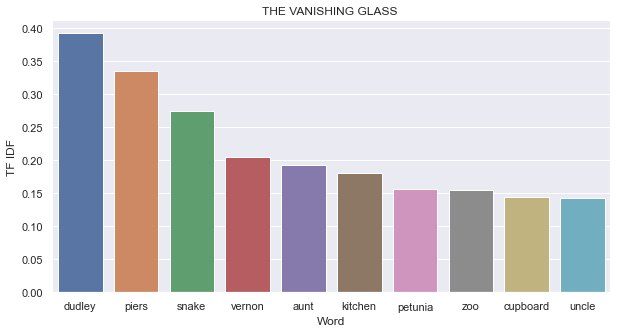

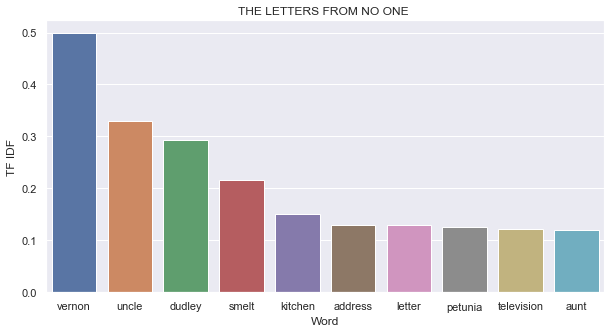

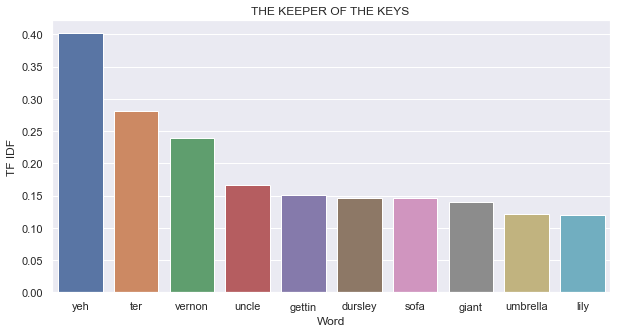

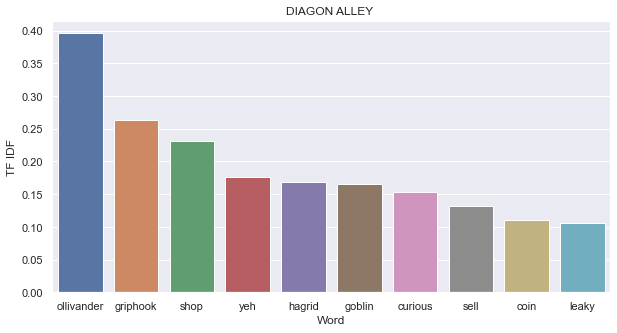

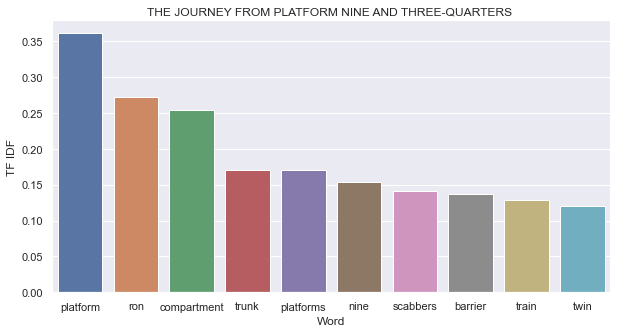

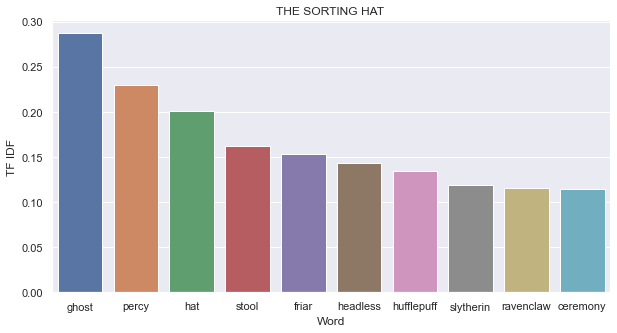

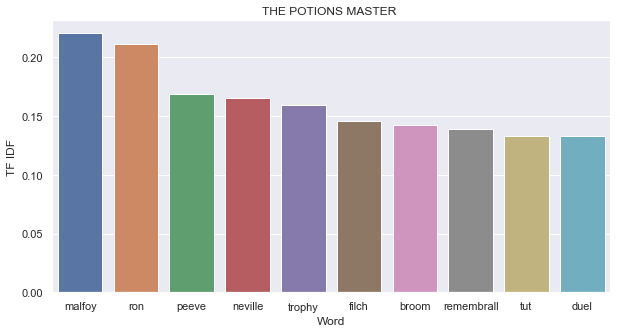

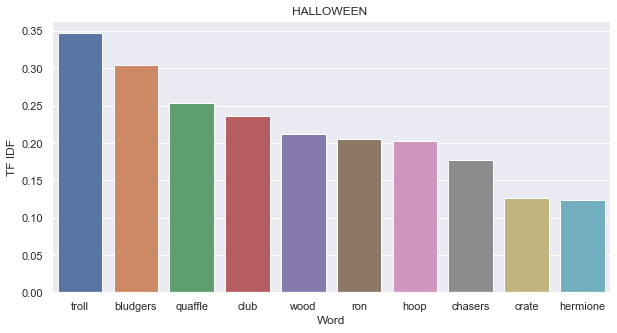

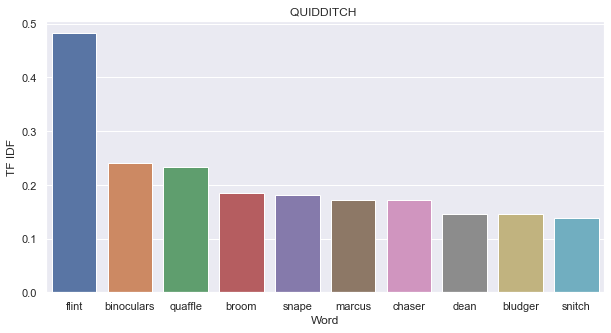

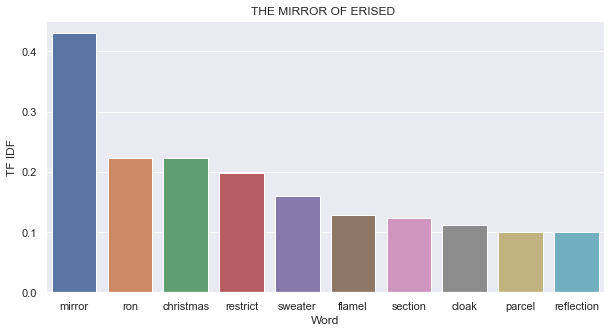

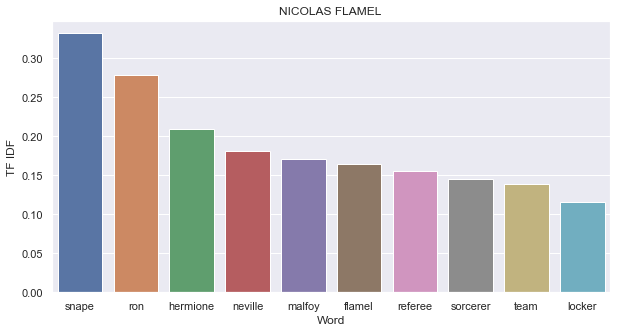

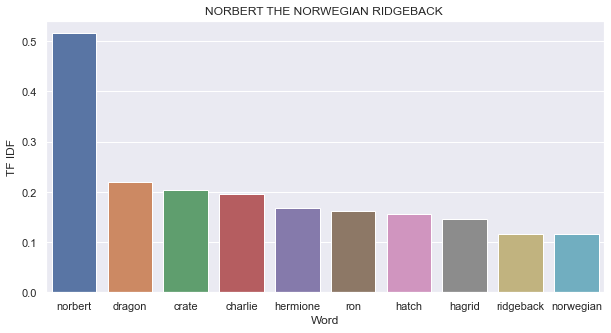

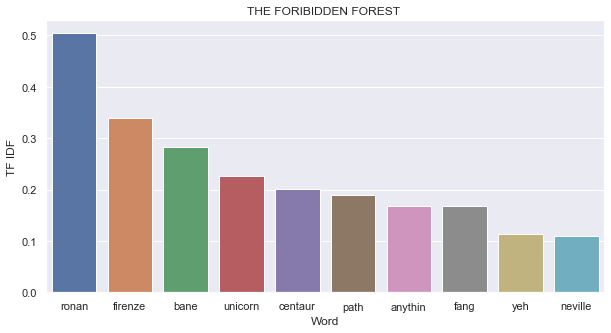

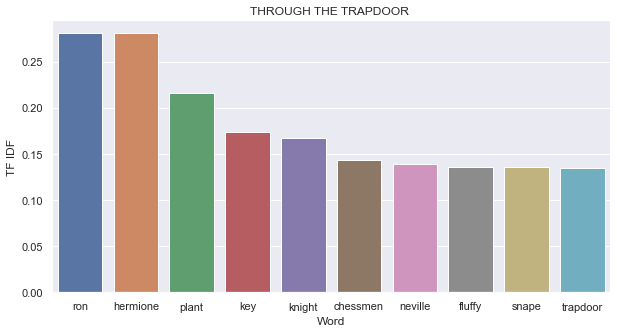

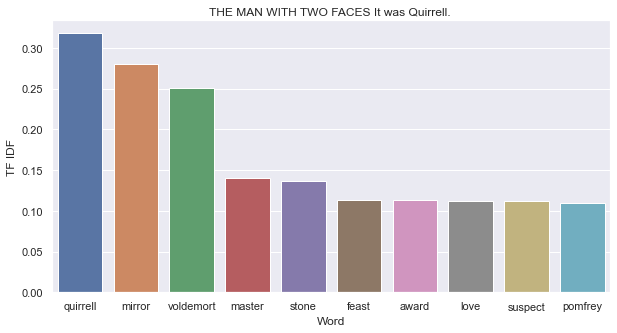

In [19]:
for n_chapter in range(len(corpus)):
    
    # Number of words to display
    n = 10

    df = pd.DataFrame(tfidf[corpus[n_chapter]])\
        .sort_values(1, ascending = False)\
        .set_axis(axis = 1, labels = ['Word', 'TF IDF'])

    df['Word'] = df['Word'].apply(lambda a: dictionary[a])
    
    sns.barplot(data = df[:n], x = 'Word', y = 'TF IDF')
    
    plt.title(chapters[n_chapter].split('\n')[0])

    plt.show()

#### TF IDF Sklearn

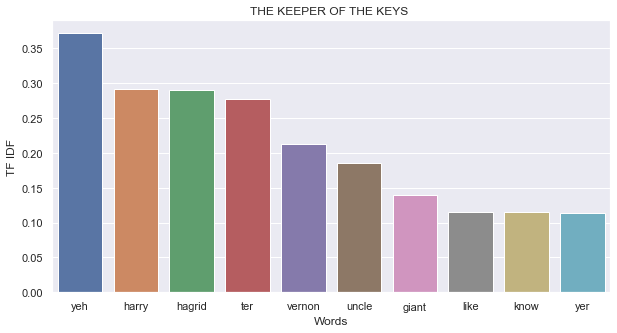

In [20]:
tfidf_vectorizer  = TfidfVectorizer(stop_words = 'english')

tfidf = tfidf_vectorizer.fit_transform(chapters)

n_chapter = 3
n = 10


df = pd.DataFrame(
    {'Words':tfidf_vectorizer.get_feature_names(), 
     'TF IDF':tfidf.toarray()[n_chapter]}
    )\
    .sort_values('TF IDF', ascending = False)

sns.barplot(data = df[:n], x = 'Words', y = 'TF IDF')

plt.title(chapters[n_chapter].split('\n')[0])

plt.show()

### NER - Named Entity Recognition

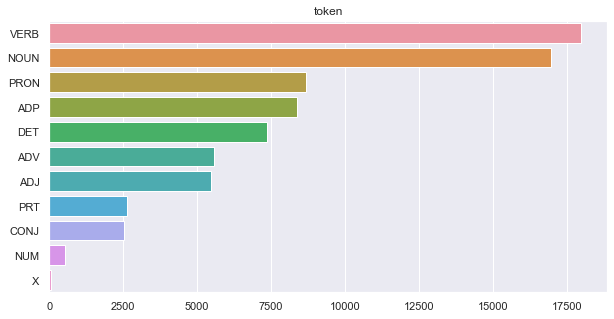

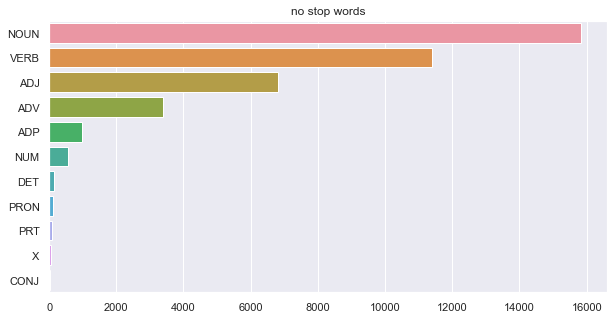

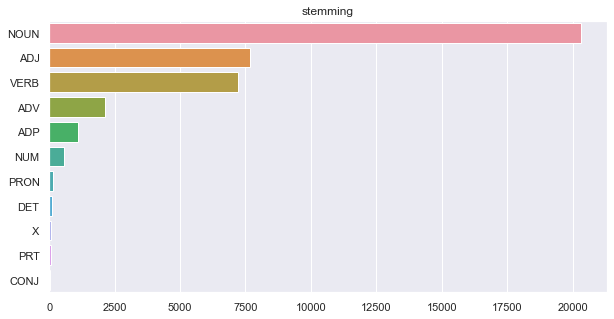

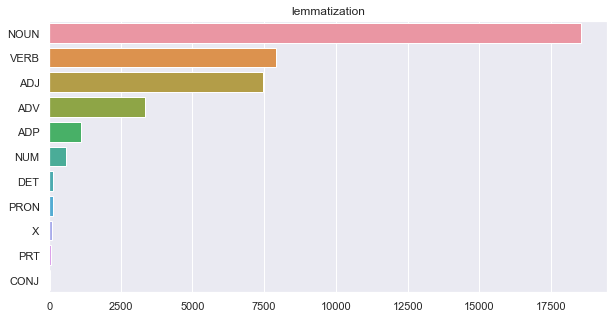

In [75]:
for i in ['token', 'no stop words', 'stemming', 'lemmatization']:

    tokens = list(
            itertools.chain.from_iterable(chapters_pd[i].to_list())
            )

    ner = nltk.pos_tag(tokens, tagset='universal')

    ner_slice = [i[1] for i in ner]

    w = Counter(ner_slice).most_common()

    sns.barplot(
        y = [a[0] for a in w],
        x = [a[1] for a in w]
    )

    plt.title(i)

    plt.show()

### Word Embedding

In [46]:
# Create word2vec model
word2vec = gensim.models.Word2Vec(chapters_pd['lemmatization'], min_count=2)

# Create weights
x = word2vec[word2vec.wv.vocab]

# Create dataframe
df = pd.DataFrame(x, index = word2vec.wv.vocab)

df.head()

<ipython-input-46-4a7ae3260546>:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  x = word2vec[word2vec.wv.vocab]


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
dursley,0.429353,-0.138949,-0.019892,0.635062,0.399398,0.279472,0.247405,-0.219753,0.329615,-0.200941,...,0.196183,0.375981,0.917804,-0.205551,0.430659,0.066763,0.546851,0.197670,0.240065,0.322157
number,0.168410,-0.056977,-0.011004,0.246712,0.154788,0.105947,0.093168,-0.087866,0.125652,-0.073520,...,0.077035,0.149065,0.356014,-0.075653,0.166782,0.030018,0.211049,0.074831,0.091263,0.127153
four,0.288328,-0.097225,-0.015748,0.412951,0.271642,0.182792,0.167350,-0.142053,0.224209,-0.135007,...,0.125116,0.253905,0.607812,-0.142461,0.287450,0.041836,0.354836,0.131878,0.161776,0.210558
privet,0.151038,-0.048964,-0.006949,0.220007,0.140473,0.094548,0.083014,-0.070863,0.113661,-0.071523,...,0.066408,0.130304,0.319294,-0.075387,0.149416,0.025429,0.190240,0.074228,0.086073,0.110151
drive,0.257213,-0.088820,-0.011876,0.381839,0.240684,0.170372,0.147467,-0.126035,0.197822,-0.118951,...,0.112736,0.220928,0.547292,-0.122756,0.263817,0.046807,0.320062,0.121144,0.143937,0.188745


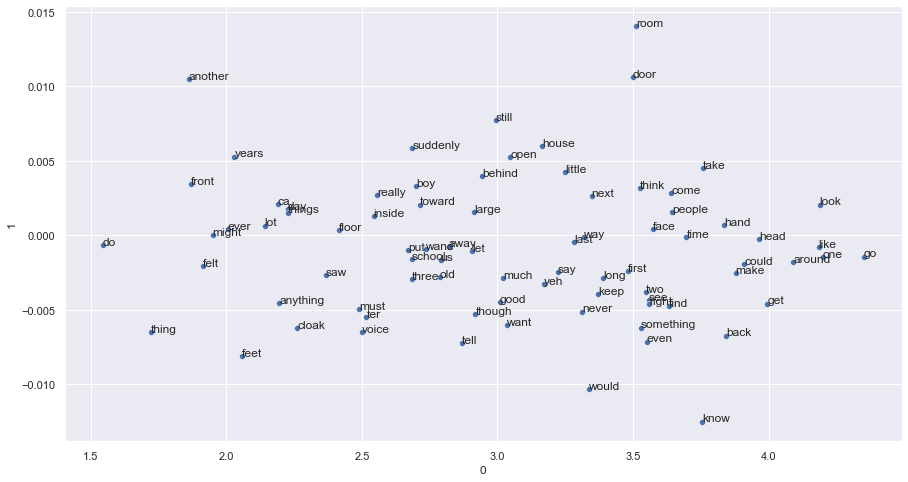

In [76]:
# Tokenize text
token = nltk.tokenize.word_tokenize(text, language = language)

# Select most common words
slicer = [
        a[0] for a in Counter(token).most_common()
        # only words in the dataframe
        if a[0] in df.index
    ][:80] # First n words

# Create PCA model
pca = PCA(n_components=2)

# Fit model
transform = pca.fit_transform(df)

# Create dataframe with results
df_new = pd.DataFrame(transform, index=df.index).loc[slicer]

# Plot size
plt.figure(figsize=(15,8))

# Plot PCA result
sns.scatterplot(x = df_new[0], y = df_new[1]
)

# Plot Labels
for pos, name in zip(df_new.values, slicer):
    
    plt.annotate(name,xy=(pos[0],pos[1]))

plt.show()

#### Word Embedding Names

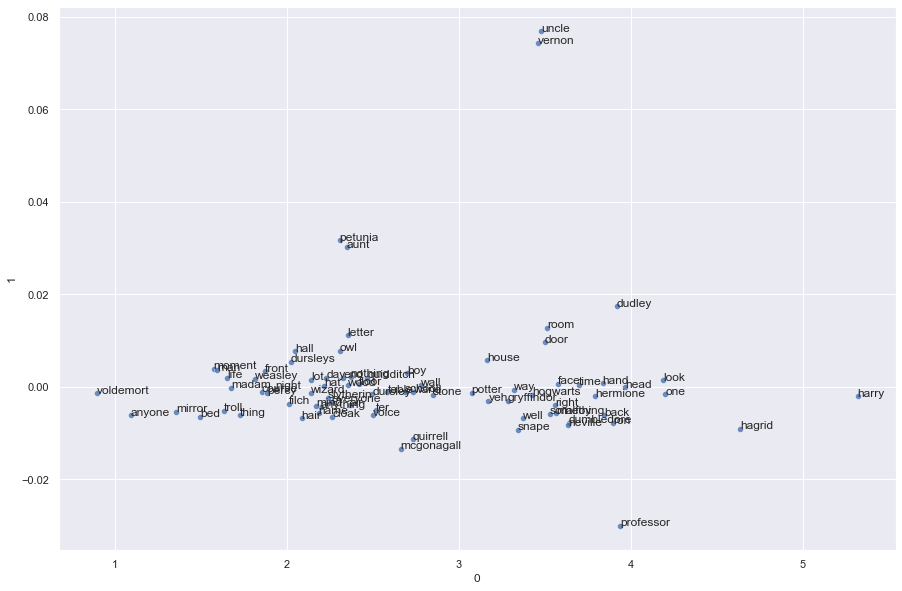

In [77]:
# Select all names
names = [i[0].lower() for i in nltk.pos_tag(token) if i[1] == 'NNP' or i[1] == 'NN']

# Select most common words
slicer = [
        a[0] for a in Counter(names).most_common()
        # only words in the dataframe
        if a[0] in df.index
    ][:80] # First n words

# Create PCA model
pca = PCA(n_components=2)

# Fit model
transform = pca.fit_transform(df)

# Create dataframe with results
df_new = pd.DataFrame(transform, index=df.index).loc[slicer]

# Plot size
plt.figure(figsize=(15,10))

# Plot PCA result
sns.scatterplot(x = df_new[0], y = df_new[1], alpha = 0.8
)

# Plot Labels
for pos, name in zip(df_new.values, slicer):
    
    plt.annotate(name,xy=(pos[0],pos[1]))

plt.show()

Gráfico com quantidade de cada classe

### N-grams

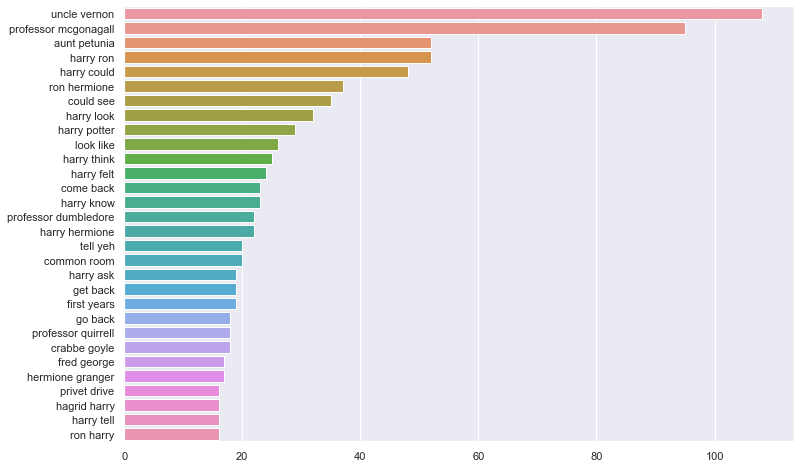

In [28]:
plt.figure(figsize=(12,8))

tokens = list(itertools.chain.from_iterable(chapters_pd['lemmatization']))

w = Counter(nltk.ngrams(tokens, 2)).most_common()[:30]

sns.barplot(
    y = [' '.join(a[0]) for a in w],
    x = [a[1] for a in w],orient = 'h'
)

plt.show()

### Graph using n Grams

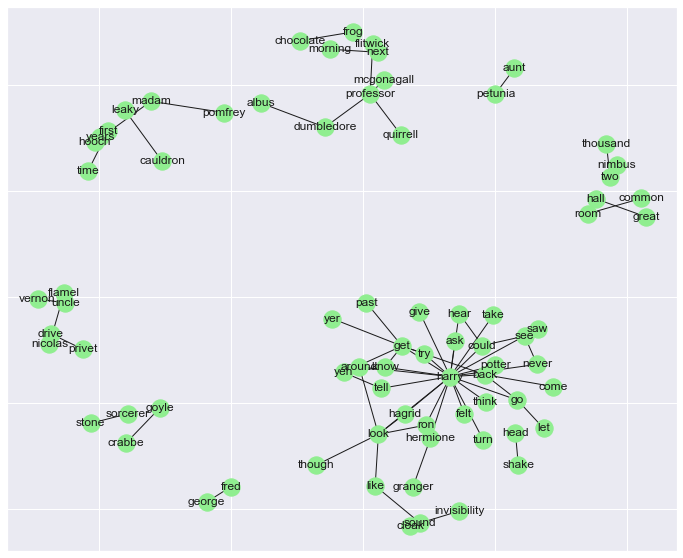

In [30]:
# Only N monst commen ngrams
n = 75

G = nx.Graph()

for i in Counter(nltk.ngrams(tokens, 2)).most_common()[:n]:
    
    G.add_edge(i[0][0], i[0][1], weight = i[1])


plt.figure(figsize=(12,10))

pos = (nx\
    #.planar_layout(G)\
    .spring_layout(G, k=0.7, scale=0.05)
    #.circular_layout(G)
    #.planar_layout(G)
    #.random_layout(G)
    #.spiral_layout(G)
      )

nx.draw_networkx(G, pos=pos, node_color='lightgreen')

plt.show()

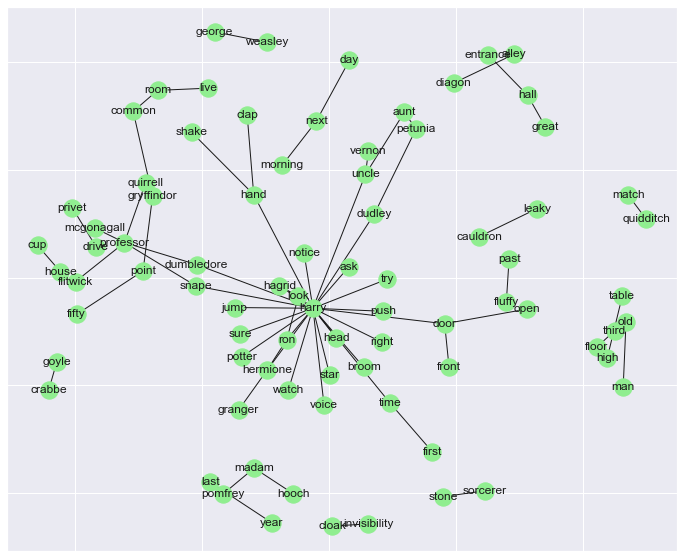

In [31]:
# Only N monst commen ngrams
n = 75

G = nx.Graph()

token_name = [i[0] for i in nltk.pos_tag(tokens) if i[1] == 'NNP' or i[1] == 'NN' or i[1] == 'JJ']

for i in Counter(nltk.ngrams(token_name, 2)).most_common()[:n]:
    
    G.add_edge(i[0][0], i[0][1], weight = i[1])


plt.figure(figsize=(12,10))

pos = (nx\
    #.planar_layout(G)\
    .spring_layout(G, k=0.7, scale=0.05)
    #.circular_layout(G)
    #.planar_layout(G)
    #.random_layout(G)
    #.spiral_layout(G)
      )

nx.draw_networkx(G, pos=pos, node_color='lightgreen')

plt.show()

### Topic modeling

In [32]:
num_topics = 5

lsamodel = gensim.models.LsiModel(corpus = corpus, num_topics = num_topics, id2word = dictionary)

t = lsamodel.get_topics()

In [33]:
for i in lsamodel.print_topics():
    print('Topic: ', i[0])
    print(i[1])
    print('-' * 60)

Topic:  0
0.617*"harry" + 0.217*"get" + 0.210*"ron" + 0.186*"go" + 0.181*"look" + 0.177*"hagrid" + 0.130*"know" + 0.129*"could" + 0.126*"hermione" + 0.120*"back"
------------------------------------------------------------
Topic:  1
0.438*"ron" + -0.332*"hagrid" + 0.297*"hermione" + -0.246*"dudley" + -0.213*"vernon" + -0.206*"uncle" + -0.189*"yeh" + 0.189*"snape" + 0.133*"neville" + 0.118*"malfoy"
------------------------------------------------------------
Topic:  2
0.512*"hagrid" + -0.373*"dudley" + -0.308*"vernon" + -0.301*"uncle" + 0.177*"yeh" + -0.173*"aunt" + -0.160*"petunia" + -0.123*"letter" + 0.111*"ter" + 0.096*"yer"
------------------------------------------------------------
Topic:  3
0.334*"dumbledore" + 0.328*"dursley" + -0.262*"harry" + -0.220*"ron" + 0.217*"professor" + 0.207*"quirrell" + 0.199*"mcgonagall" + 0.197*"could" + 0.146*"cat" + 0.142*"potter"
------------------------------------------------------------
Topic:  4
0.448*"quirrell" + 0.227*"harry" + 0.212*"stone

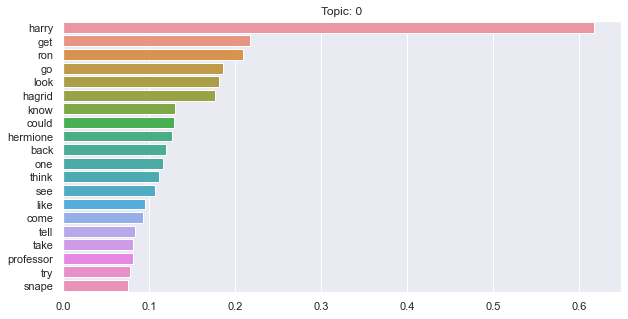

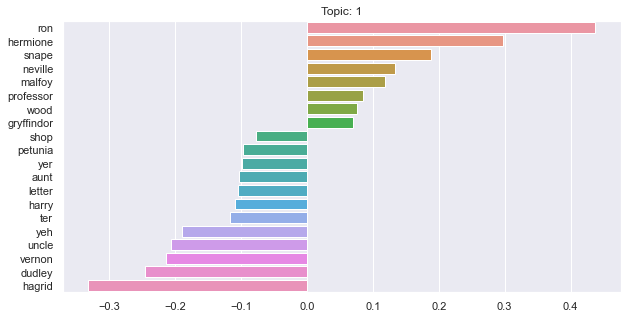

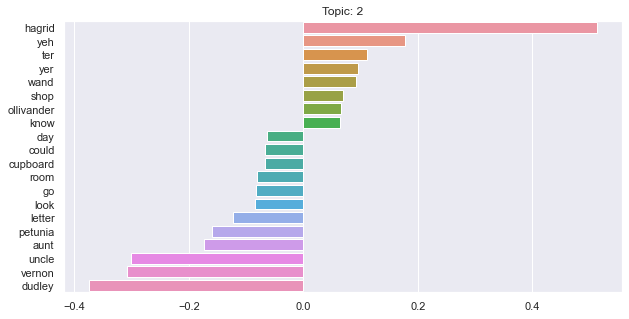

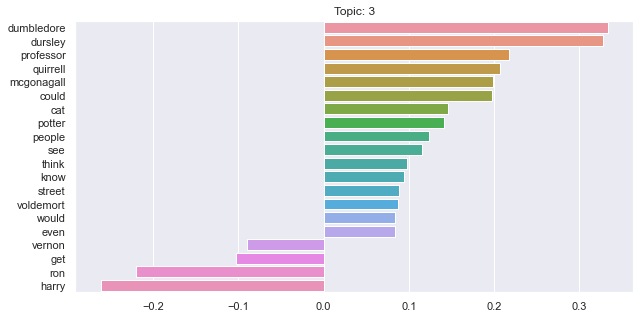

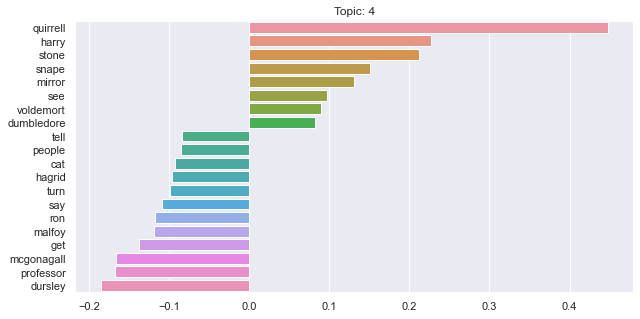

In [34]:
for n_chapter in range(len(t)):
    
    n = 20

    r = {dictionary[i]:t[n_chapter][i] for i in dictionary}

    df = pd.Series(r).sort_values(ascending = False)

    cut = np.abs(df).sort_values(ascending = False)[n]

    df_cut = df[np.abs(df) > cut]

    sns.barplot(
        x = df_cut,
        y = df_cut.index
    )
    
    plt.title(f'Topic: {n_chapter}')

    plt.show()

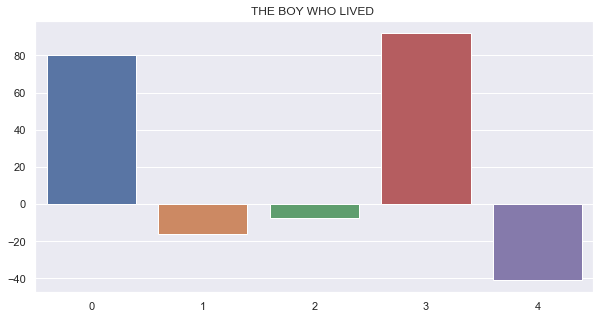

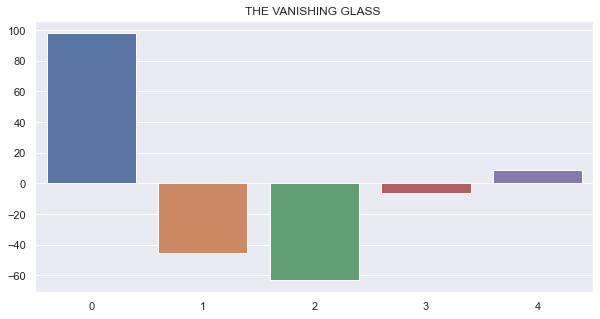

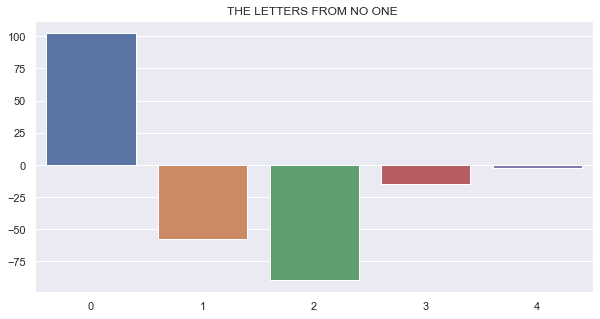

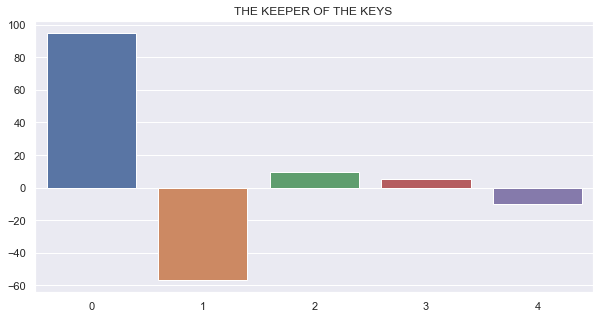

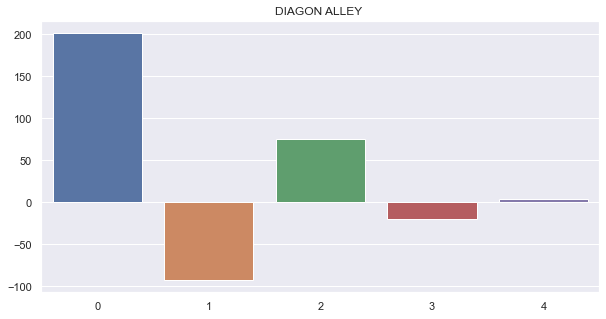

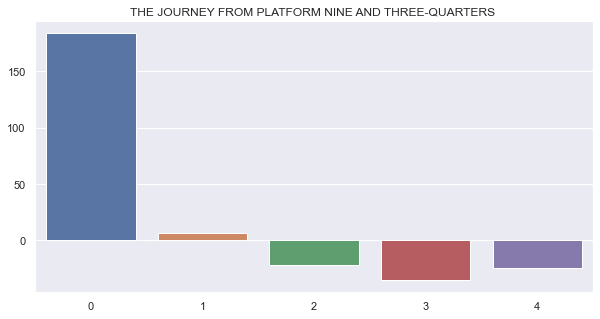

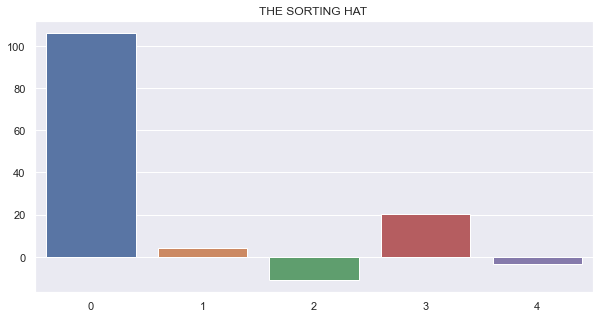

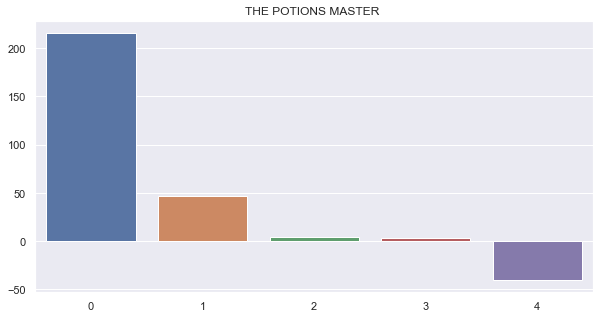

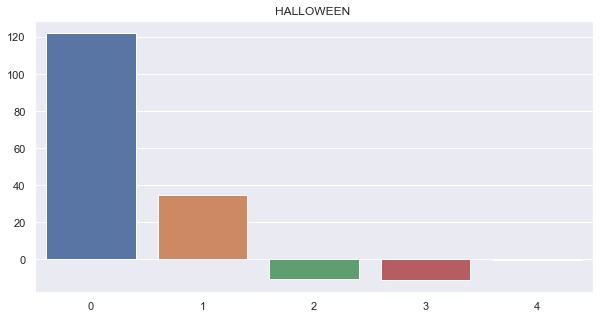

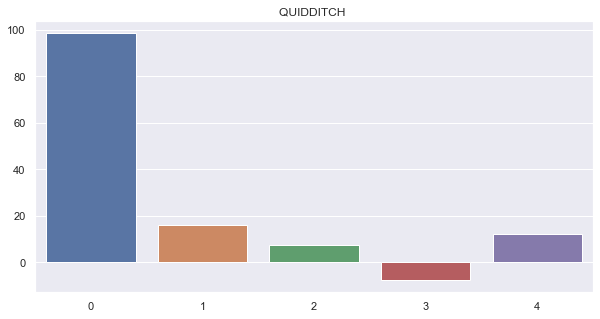

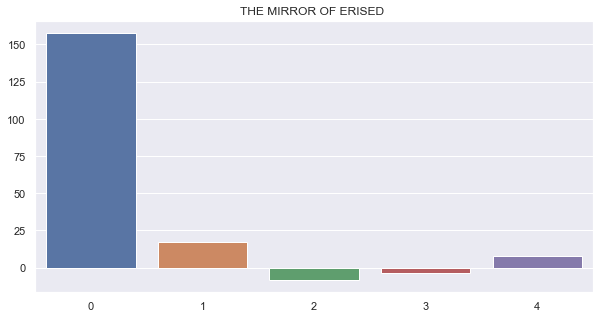

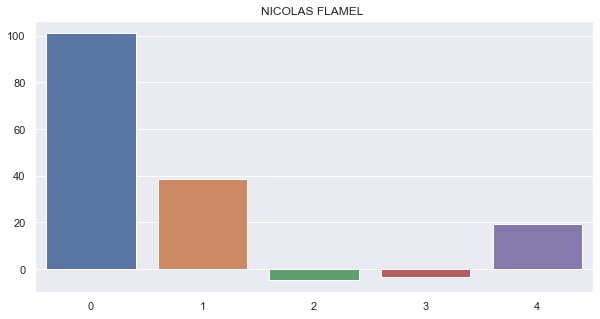

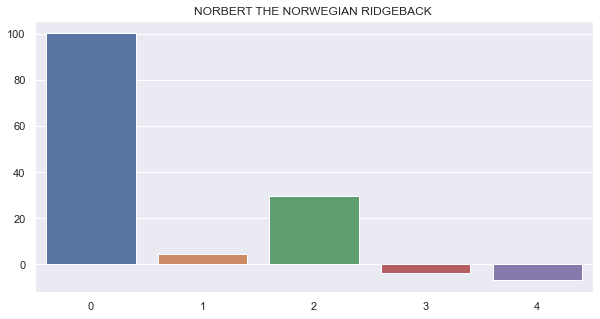

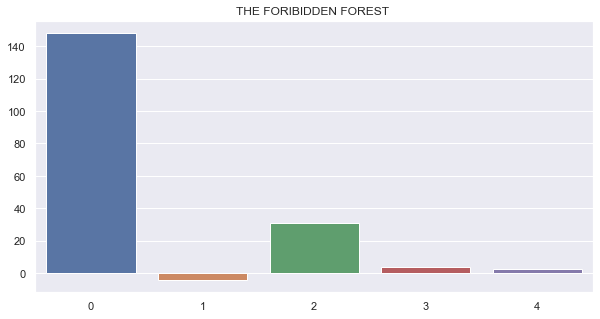

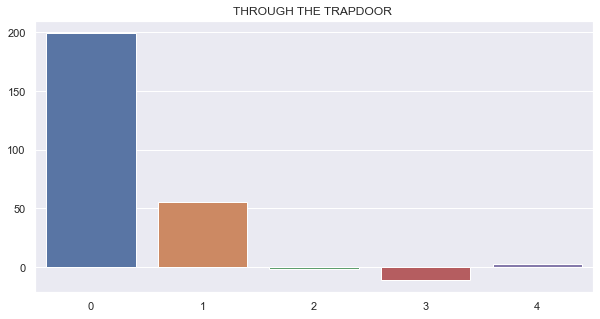

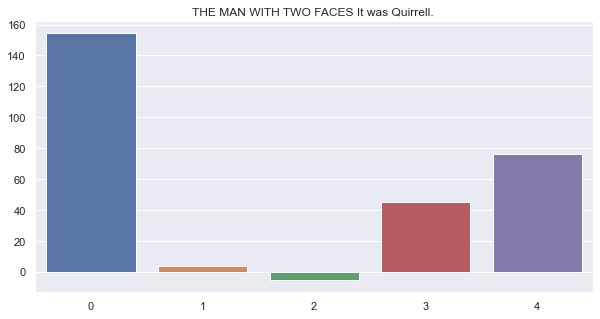

In [35]:
for n, d in enumerate(lsamodel[corpus]):
    
    sns.barplot(y = [i[1] for i in d], x = np.arange(len(t)))
    
    plt.title(chapters[n].split('\n')[0])
    
    plt.show()

### Sentiment Analysis

In [78]:
analyzer = SentimentIntensityAnalyzer()

d = {}
for n, s in enumerate(chapters_pd['lemmatization']):
    
    d[chapters_pd.index[n]] = analyzer.polarity_scores(' '.join(s))

df = pd.DataFrame(d).transpose()

df

,neg,neu,pos,compound
THE BOY WHO LIVED,0.103,0.745,0.152,0.9989
THE VANISHING GLASS,0.116,0.746,0.138,0.9851
THE LETTERS FROM NO ONE,0.101,0.776,0.123,0.9930
THE KEEPER OF THE KEYS,0.164,0.692,0.145,-0.9878
DIAGON ALLEY,0.087,0.756,0.157,0.9998
THE JOURNEY FROM PLATFORM NINE AND THREE-QUARTERS,0.101,0.770,0.129,0.9988
THE SORTING HAT,0.106,0.718,0.176,0.9996
THE POTIONS MASTER,0.117,0.759,0.124,0.9929
HALLOWEEN,0.111,0.727,0.162,0.9991
QUIDDITCH,0.127,0.731,0.142,0.9836


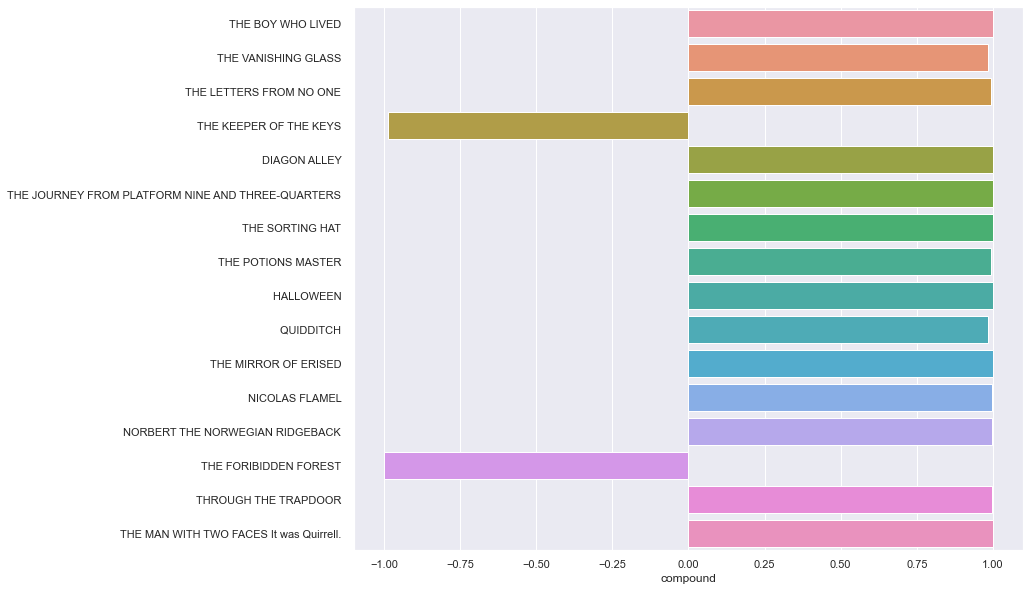

In [40]:
plt.figure(figsize=(12,10))

sns.barplot(
    y = df.index,
    x = df['compound'],
    orient='h'
)

plt.show()

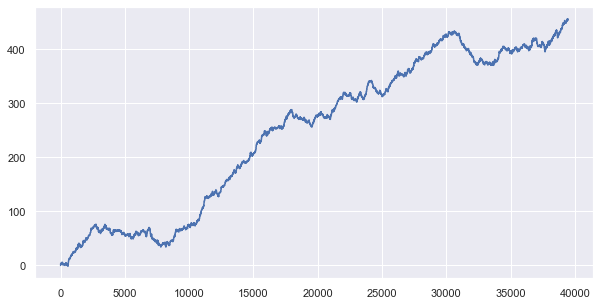

In [79]:
sentiment = []

for i in itertools.chain.from_iterable(chapters_pd['no stop words']):
    sentiment.append(analyzer.polarity_scores(i))

sentiment_pd = pd.DataFrame(sentiment)

sentiment_pd['net'] = sentiment_pd['pos'] - sentiment_pd['neg']

sentiment_pd['net'].cumsum().plot()

plt.show()